In [ ]:
import face_recognition

In [ ]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Face Detection and Drawing utilities
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def detect_faces(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found. Check the file path.")
        return None

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Convert the image to RGB
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # If faces are detected, draw the bounding boxes
        if results.detections:
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection)

        # Return the processed image and detection results
        return image, results.detections

# Specify the image path
image_path = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/frames/frame_150.jpg"  # Replace with your image file path

# Detect faces and get the processed image
output_image, detections = detect_faces(image_path)

# Print the number of detected faces
if detections:
    print(f"Detected {len(detections)} faces.")
else:
    print("No faces detected.")

# Display the image with bounding boxes
if output_image is not None:
    cv2.imshow("Detected Faces", output_image)
    cv2.waitKey(0)  # Wait for a key press to close the window
    cv2.destroyAllWindows()


libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open zink: /usr/lib/dri/zink_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

No faces detected.


In [ ]:
from deepface import DeepFace

def verify_faces(img1_path, img2_path):
    result = DeepFace.verify(img1_path, img2_path)
    return result["verified"]

img1_path = "images.jpeg"  # Replace with your image paths
img2_path = "316605.3.webp"
is_same_person = verify_faces(img1_path, img2_path)
print(f"Are these the same person? {is_same_person}")


In [ ]:
import os
import requests
from tqdm import tqdm

def download_video(url, output_dir):
    filename = url.split("/")[-1]
    file_path = os.path.join(output_dir, filename)
    print(f"Attempting to save to: {file_path}")
    
    if os.path.exists(file_path):
        print(f"{filename} already downloaded.")
        return file_path

    response = requests.get(url, stream=True)
    if response.status_code == 200:
        total_size = int(response.headers.get("content-length", 0))
        with open(file_path, "wb") as f, tqdm(
            desc=f"Downloading {filename}",
            total=total_size,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
        ) as bar:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
                bar.update(len(chunk))
        if os.path.exists(file_path):
            print(f"Downloaded and saved: {file_path}")
        else:
            print(f"Failed to save file: {file_path}")
        return file_path
    else:
        print(f"Failed to download {url}, HTTP status: {response.status_code}")
        return None

def download_videos_from_urls(url_list, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for url in url_list:
        download_video(url, output_dir)

# Example usage
video_urls = [
    "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-997580728807604",
]  # Add more URLs here

videos_dir = "influencer_analysis/videos"
download_videos_from_urls(video_urls, videos_dir)


In [4]:
import requests
import os

def download_video(url, output_dir="./videos"):
    os.makedirs(output_dir, exist_ok=True)
    filename = url.split("/")[-1]  # Use the last part of the URL as the filename
    filepath = os.path.join(output_dir, filename)
    
    if os.path.exists(filepath):
        print(f"Video already exists: {filepath}")
        return filepath
    
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filepath, "wb") as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
        print(f"Downloaded video: {filepath}")
        return filepath
    else:
        print(f"Failed to download video from {url}")
        return None

# Example usage
video_url = "https://fgimagestorage.blob.core.windows.net/facebook-assets/hd-992064161877405"
video_path = download_video(video_url)


Video already exists: ./videos/hd-992064161877405


In [5]:
import cv2

def extract_frames(video_path, output_dir="./frames", frame_rate=1):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return
    
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_interval = int(fps / frame_rate)
    success, frame = cap.read()
    count = 0

    os.makedirs(output_dir, exist_ok=True)

    while success:
        if count % frame_interval == 0:
            frame_filename = os.path.join(output_dir, f"frame_{count}.jpg")
            cv2.imwrite(frame_filename, frame)
        success, frame = cap.read()
        count += 1
    cap.release()
    print(f"Frames extracted to: {output_dir}")

# Example usage
frames_dir = "./frames"
extract_frames(video_path, frames_dir)


Frames extracted to: ./frames


In [1]:
import cv2
import mediapipe as mp
import os
from collections import Counter
from deepface import DeepFace
import numpy as np

# Initialize Mediapipe face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def are_faces_similar(embedding1, embedding2, threshold=0.9):
    """Check if two face embeddings are similar based on a threshold."""
    distance = np.linalg.norm(embedding1 - embedding2)  # Euclidean distance
    return distance < threshold

def detect_faces(frame_path):
    """Detect faces in a single frame and return cropped faces with bounding boxes."""
    image = cv2.imread(frame_path)
    if image is None:
        print(f"Error: Could not read image from {frame_path}")
        return [], image

    cropped_faces = []
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.9) as face_detection:
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.detections:
            for detection in results.detections:
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = image.shape
                x_min = int(bbox.xmin * w)
                y_min = int(bbox.ymin * h)
                box_width = int(bbox.width * w)
                box_height = int(bbox.height * h)

                # Ensure the bounding box is within image bounds
                x_min = max(0, x_min)
                y_min = max(0, y_min)
                x_max = min(w, x_min + box_width)
                y_max = min(h, y_min + box_height)

                # Crop the detected face
                cropped_face = image[y_min:y_max, x_min:x_max]
                cropped_faces.append((cropped_face, (x_min, y_min, x_max, y_max)))

    return cropped_faces, image

def count_faces_in_video(frames_dir):
    """Count faces across all frames in a directory, grouping similar faces."""
    if not os.path.exists(frames_dir):
        print(f"Error: Directory {frames_dir} does not exist.")
        return Counter(), {}

    face_counter = Counter()
    face_to_frame_map = {}
    known_embeddings = []  # Store unique face embeddings
    known_face_ids = []    # Map embeddings to unique face IDs

    for frame_file in os.listdir(frames_dir):
        frame_path = os.path.join(frames_dir, frame_file)
        if not frame_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue  # Skip non-image files

        faces, image = detect_faces(frame_path)
        if faces:
            for cropped_face, bbox in faces:
                try:
                    # Step 1: Extract face embedding
                    embedding = DeepFace.represent(img_path=cropped_face, model_name="VGG-Face")[0]["embedding"]

                    # Step 2: Check if this embedding matches any known embedding
                    match_found = False
                    for i, known_embedding in enumerate(known_embeddings):
                        if are_faces_similar(embedding, known_embedding):
                            face_id = known_face_ids[i]
                            face_counter[face_id] += 1
                            match_found = True
                            break

                    # Step 3: If no match found, assign a new ID
                    if not match_found:
                        face_id = len(known_embeddings) + 1  # Generate a new face ID
                        known_embeddings.append(embedding)
                        known_face_ids.append(face_id)
                        face_counter[face_id] += 1
                        # Store the first occurrence of this face for visualization
                        if face_id not in face_to_frame_map:
                            face_to_frame_map[face_id] = (image, (cropped_face, bbox))
                except Exception as e:
                    print(f"Error processing face: {e}")

    return face_counter, face_to_frame_map

def display_face(image, face):
    """Draw and display a detected face on the image."""
    cropped_face, bbox = face
    x_min, y_min, x_max, y_max = bbox

    # Draw a rectangle around the face
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Display the image
    cv2.imshow("Most Frequent Face", image)
    cv2.imshow("Cropped Face", cropped_face)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



# Example usage
frames_dir = "./frames"  # Replace with your directory of frames
face_counts, face_to_frame_map = count_faces_in_video(frames_dir)
most_frequent_face_id=0

if face_counts:
    most_frequent_face_id = face_counts.most_common(1)[0][0]
    print(f"Most frequent face ID: {most_frequent_face_id} with {face_counts[most_frequent_face_id]} occurrences")
    # Display the most frequent face
    image, face = face_to_frame_map[most_frequent_face_id]
    display_face(image, face)
else:
    print("No faces detected in the video.")


2024-11-30 03:33:25.812730: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-30 03:33:25.820093: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 03:33:25.976588: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-30 03:33:25.979606: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-30 03:33:28.460912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

No faces detected in the video.


In [2]:
import numpy as np
import os

def save_face_embedding(face_id, face_embedding, embedding_dir="./embeddings"):
    """
    Save the face embedding or unique identifier to a file.
    :param face_id: Unique ID of the face.
    :param face_embedding: Data to save (e.g., an array or identifier).
    :param embedding_dir: Directory to save the embeddings.
    :return: Path to the saved embedding file.
    """
    os.makedirs(embedding_dir, exist_ok=True)  # Create the directory if it doesn't exist
    embedding_path = os.path.join(embedding_dir, f"face_{face_id}.npy")
    np.save(embedding_path, face_embedding)  # Save the face embedding
    print(f"Saved face embedding: {embedding_path}")
    return embedding_path

# Example usage

if(most_frequent_face_id!=0):
    embedding_path = save_face_embedding(most_frequent_face_id, str(face))

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def are_embeddings_similar(file1, file2, threshold=0.2):
    """
    Compare two .npy embedding files and determine if they are similar.
    
    :param file1: Path to the first .npy file.
    :param file2: Path to the second .npy file.
    :param threshold: Cosine similarity threshold for determining similarity.
    :return: True if embeddings are similar, False otherwise.
    """
    # Load embeddings from .npy files
    embedding1 = np.load(file1)
    embedding2 = np.load(file2)

    # Ensure embeddings are 2D for cosine similarity calculation
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)

    # Compute cosine similarity
    similarity = cosine_similarity(embedding1, embedding2)[0][0]

    # Compare similarity to the threshold
    print(f"Cosine Similarity: {similarity:.4f}")
    return similarity >= threshold

# Example usage
file1 = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/embeddings/hd-604041931565137/face_1.npy"  # Replace with your actual path
file2 = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/embeddings/hd-605272664726548/face_1.npy"  # Replace with your actual path

if are_embeddings_similar(file1, file2):
    print("The embeddings are similar.")
else:
    print("The embeddings are not similar.")


Cosine Similarity: 0.1820
The embeddings are not similar.


In [3]:
from ultralytics import YOLO
import cv2

# Initialize the YOLO model
model = YOLO('/home/harshit/Desktop/hi/influencer_analysis/notebooks/yolov8n.pt')  # Use 'yolov5s' for small and fast detections. Replace with custom model if needed.

def detect_objects_in_image(image_path, output_path):
    # Load the image
    image = cv2.imread(image_path)

    # Perform object detection
    results = model(image)

    # Draw bounding boxes on the image
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = box.conf[0]  # Confidence score
            cls = box.cls[0]  # Class ID
            label = model.names[int(cls)]  # Class label

            # Draw rectangle and label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save and show the output image
    cv2.imwrite(output_path, image)
    cv2.imshow("Object Detection", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Call the function
image_path = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/frames/hd-790055392972248/frame_210.jpg"
output_path = "/home/harshit/Desktop/hi/images.jpg"
detect_objects_in_image(image_path, output_path)



0: 640x384 3 persons, 1 train, 36.7ms
Speed: 0.9ms preprocess, 36.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)


QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread (0x893a430).
Cannot move to target thread (0x81d60f0)

QObject::moveToThread: Current thread (0x81d60f0) is not the object's thread

In [4]:
import cv2
import numpy as np
import os

def extract_color_histogram(video_path, bins=(8, 8, 8)):
    cap = cv2.VideoCapture(video_path)
    histograms = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Convert frame to HSV
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # Compute color histogram
        hist = cv2.calcHist([hsv_frame], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        histograms.append(hist)
    
    cap.release()
    return np.mean(histograms, axis=0)  # Return the average histogram


In [11]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd

dataset_path = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/videos_without_faces.xlsx"
df = pd.read_excel(dataset_path)
video_ids = df["Video URL"].apply(lambda x: x.split("/")[-1]).tolist()
def compute_similarity(features):
    # Ensure input is a 2D array
    features = np.array(features)
    if len(features.shape) != 2:
        raise ValueError("Features array must be 2-dimensional. Check your input.")

    # Compute pairwise distances between features
    distances = cdist(features, features, metric='cosine')
    return distances

# Example Usage
video_features = []
video_dir = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/videos"

for video_file in os.listdir(video_dir):
    video_id = video_file.split("/")[-1]  # Extract the file name as ID
    if video_id in video_ids:  # Check if the file is in the dataset
        video_path = os.path.join(video_dir, video_file)
        print(f"Processing: {video_id}")
        
        hist = extract_color_histogram(video_path)
        if hist is not None:  # Ensure feature extraction succeeded
            video_features.append(hist)


# Validate and compute similarity
if len(video_features) == 0:
    print("No features were extracted. Check your video files or extraction logic.")
else:
    similarity_matrix = compute_similarity(video_features)
    print("Similarity matrix:", similarity_matrix)


Processing: hd-999607261342550
Processing: hd-935558767885747
Processing: hd-882993126248062
Processing: hd-814072014151046
Processing: hd-929511878466995
Processing: hd-687665956347322
Processing: hd-676770877464110
Processing: hd-873043573965895
Processing: hd-967731231014052
Processing: hd-944755280756437
Processing: hd-673961584214053
Processing: hd-786610583313461
Processing: hd-894457734962164
Processing: hd-964733417506862
Processing: hd-879049300656635
Processing: hd-944160410298140
Processing: hd-951885082053340
Processing: hd-966715248087290
Processing: hd-881925359723909
Processing: hd-802443478544141
Processing: hd-991636695150147
Processing: hd-613197413789434
Processing: hd-1118763132933218
Processing: hd-978448136455993
Processing: hd-925596815118953
Processing: hd-904480964010630
Processing: hd-875485623676104
Processing: hd-611188517518682
Processing: hd-818776323774715
Processing: hd-872222594086011
Processing: hd-905844110841635
Processing: hd-872760463806517
Process

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_videos(features, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features)
    return labels

# Cluster videos
labels = cluster_videos(video_features, n_clusters=40)

# Print results
for idx, label in enumerate(labels):
    print(f"Video {idx + 1}: Cluster {label}")


/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Video 1: Cluster 0
Video 2: Cluster 0
Video 3: Cluster 0
Video 4: Cluster 20
Video 5: Cluster 36
Video 6: Cluster 0
Video 7: Cluster 0
Video 8: Cluster 0
Video 9: Cluster 0
Video 10: Cluster 0
Video 11: Cluster 0
Video 12: Cluster 0
Video 13: Cluster 0
Video 14: Cluster 14
Video 15: Cluster 16
Video 16: Cluster 0
Video 17: Cluster 22
Video 18: Cluster 0
Video 19: Cluster 4
Video 20: Cluster 8
Video 21: Cluster 0
Video 22: Cluster 15
Video 23: Cluster 7
Video 24: Cluster 0
Video 25: Cluster 0
Video 26: Cluster 13
Video 27: Cluster 0
Video 28: Cluster 4
Video 29: Cluster 1
Video 30: Cluster 0
Video 31: Cluster 0
Video 32: Cluster 0
Video 33: Cluster 8
Video 34: Cluster 6
Video 35: Cluster 37
Video 36: Cluster 0
Video 37: Cluster 0
Video 38: Cluster 0
Video 39: Cluster 3
Video 40: Cluster 0
Video 41: Cluster 1
Video 42: Cluster 0
Video 43: Cluster 0
Video 44: Cluster 0
Video 45: Cluster 2
Video 46: Cluster 0
Video 47: Cluster 0
Video 48: Cluster 0
Video 49: Cluster 0
Video 50: Cluster 13


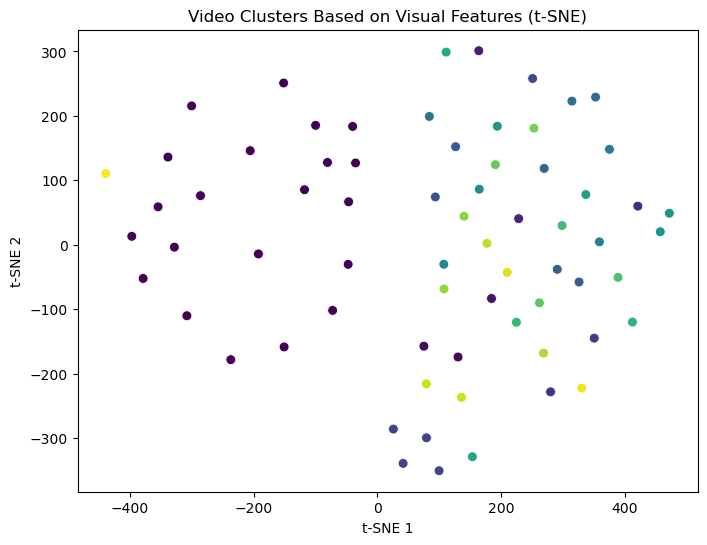

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

def visualize_clusters_tsne(features, labels):
    # Ensure features are a 2D NumPy array
    features_array = np.array(features)
    
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    reduced_features = tsne.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=reduced_features[:, 0],
        y=reduced_features[:, 1],
        hue=labels,
        palette='viridis',
        s=50,
        legend=None
    )
    plt.title("Video Clusters Based on Visual Features (t-SNE)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()

# Visualize with fixed t-SNE
visualize_clusters_tsne(video_features, labels)
#basically n-dimentional vector so it cant be properly visaulised on 2d plane


/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/harshit/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

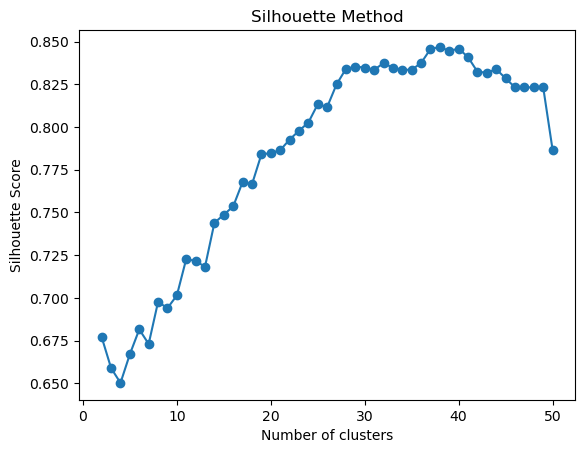

In [24]:
from sklearn.metrics import silhouette_score

def find_optimal_silhouette(features, max_clusters=50):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):  # Silhouette requires at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(features)
        silhouette_scores.append(silhouette_score(features, labels))

    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

# Find the optimal number of clusters
find_optimal_silhouette(video_features)


In [29]:
import pandas as pd
import random

dataset = pd.read_excel("/home/harshit/Desktop/hi/influencer_analysis/notebooks/videos_without_faces.xlsx")

def assign_cluster_names(labels):
    # Assign a random influencer name to each cluster
    unique_labels = list(set(labels))
    cluster_names = {label: f"Influencer_{random.randint(1, 40)}" for label in unique_labels}
    return [cluster_names[label] for label in labels]

def save_cluster_results(dataset, labels, performance, output_file="clustered_results.xlsx"):
    # Assign cluster names
    cluster_names = assign_cluster_names(labels)

    # Create a DataFrame
    data = {
        "Video URL": dataset["Video URL"],
        "Performance": performance,
        "Cluster Name": cluster_names
    }
    df = pd.DataFrame(data)

    # Group by cluster and calculate average performance
    grouped = df.groupby("Cluster Name").agg(
        {"Video URL": list, "Performance": "mean"}
    ).reset_index()

    # Save results to Excel
    grouped.rename(columns={"Performance": "Average Performance", "Video URL": "Videos"}, inplace=True)
    grouped.to_excel(output_file, index=False)
    print(f"Results saved to {output_file}")

# Save cluster results
save_cluster_results(dataset, labels, dataset["Performance"])


Results saved to clustered_results.xlsx


/tmp/ipykernel_39794/1773298371.py:31: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  grouped.to_excel(output_file, index=False)


In [37]:
print((similarity_matrix))

[[          0           0           0 ...           0      0.9575           0]
 [          0           0           0 ...           0      0.9575           0]
 [          0           0           0 ...           0      0.9575           0]
 ...
 [          0           0           0 ...           0      0.9575           0]
 [     0.9575      0.9575      0.9575 ...      0.9575           0      0.9575]
 [          0           0           0 ...           0      0.9575           0]]


In [38]:
import pandas as pd

def save_similarity_matrix_to_excel(similarity_matrix, output_file="similarity_matrix.xlsx"):
    """
    Save the similarity matrix to an Excel file.
    
    Parameters:
    - similarity_matrix: The similarity matrix (2D array or DataFrame).
    - video_files: List of video file names corresponding to rows/columns of the matrix.
    - output_file: The name of the output Excel file.
    """
    # Create a DataFrame with video files as both row and column labels
    df = pd.DataFrame(similarity_matrix)

    # Save DataFrame to an Excel file
    df.to_excel(output_file, index=True)
    print(f"Similarity matrix saved to {output_file}")

# Example usage
# similarity_matrix is assumed to be a 2D array or DataFrame
# video_files is a list of video file names corresponding to the rows/columns of the similarity matrix
save_similarity_matrix_to_excel(similarity_matrix)


/tmp/ipykernel_39794/4121081152.py:16: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel(output_file, index=True)


Similarity matrix saved to similarity_matrix.xlsx


In [44]:
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[i])):
        if similarity_matrix[i][j] >0.98:
            print(f"Similarity of 1 found at: Row {i}, Column {j}")


Similarity of 1 found at: Row 3, Column 21
Similarity of 1 found at: Row 21, Column 3
Similarity of 1 found at: Row 21, Column 53
Similarity of 1 found at: Row 53, Column 21


In [46]:
import os
import pandas as pd
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

# Load the dataset
dataset_path = "/home/harshit/Desktop/hi/influencer_analysis/notebooks/videos_without_faces.xlsx"
df = pd.read_excel(dataset_path)

# Extract video IDs
df["Video ID"] = df["Video URL"].apply(lambda x: x.split("/")[-1])

# Function to load the last frame from the directory
def load_last_frame(video_id, frame_dir="/home/harshit/Desktop/hi/influencer_analysis/notebooks/frames",target_size=(300, 300)):
    video_frame_dir = os.path.join(frame_dir, video_id)
    if not os.path.exists(video_frame_dir):
        print(f"Frame directory not found for video ID: {video_id}")
        return None
    
    # Identify the last frame file based on the largest number in the filename
    frame_files = [f for f in os.listdir(video_frame_dir) if f.startswith("frame_") and f.endswith(".jpg")]
    if not frame_files:
        print(f"No frames found for video ID: {video_id}")
        return None

    # Extract frame number and find the highest
    frame_files_sorted = sorted(frame_files, key=lambda x: int(x.replace("frame_", "").replace(".jpg", "")))
    last_frame_path = os.path.join(video_frame_dir, frame_files_sorted[-1])  # Last frame in the sorted list
    frame = cv2.imread(last_frame_path, cv2.IMREAD_COLOR)
    frame_resized = cv2.resize(frame, target_size, interpolation=cv2.INTER_AREA)
    return frame_resized
    return frame

# Function to compute similarity between frames
def compute_frame_similarity(frame1, frame2):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    similarity, _ = ssim(gray1, gray2, full=True)
    return similarity

# Categorize videos based on last frames
def categorize_videos(df):
    video_frames = {}
    clusters = {}
    cluster_id = 0
    
    # Load all frames
    for video_id in df["Video ID"]:
        frame = load_last_frame(video_id)
        if frame is not None:
            video_frames[video_id] = frame
    
    # Compare frames and group similar ones
    for video_id, frame in video_frames.items():
        matched = False
        for cluster, cluster_frames in clusters.items():
            # Compare with a representative frame from the cluster
            similarity = compute_frame_similarity(frame, video_frames[cluster_frames[0]])
            if similarity > 0.9:  # Similarity threshold
                clusters[cluster].append(video_id)
                matched = True
                break
        if not matched:
            clusters[cluster_id] = [video_id]
            cluster_id += 1

    # Prepare results
    results = []
    for cluster, video_ids in clusters.items():
        avg_performance = df[df["Video ID"].isin(video_ids)]["Performance"].mean()
        video_urls = df[df["Video ID"].isin(video_ids)]["Video URL"].tolist()
        results.append({
            "Cluster ID": cluster,
            "Video URLs": ", ".join(video_urls),
            "Average Performance": avg_performance,
            "Face Image": "No image available"
        })

    return results

# Categorize videos
results = categorize_videos(df)

# Save results to Excel
output_df = pd.DataFrame(results)
output_file = "categorized_videos.xlsx"
output_df.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


Results saved to categorized_videos.xlsx


/tmp/ipykernel_39794/1947707713.py:88: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  output_df.to_excel(output_file, index=False)
